In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [3]:
df = pd.read_hdf('data-p1\electoral_college_agg_polls_by_day.h5')
df

,pollster,state,population,day,grade,weighted_clinton,weighted_trump,samplesize_total,c-minus-t,electoral_college
0,ABC News/Washington Post,Maryland,lv,2016-09-27,A+,63.0,27.0,706.0,36.0,10.0
1,ABC News/Washington Post,Maryland,lv,2016-09-28,B,63.0,27.0,706.0,36.0,10.0
2,ABC News/Washington Post,Maryland,lv,2016-09-29,A-,63.0,27.0,706.0,36.0,10.0
3,ABC News/Washington Post,Maryland,lv,2016-09-30,B,63.0,27.0,706.0,36.0,10.0
4,ABC News/Washington Post,Maryland,rv,2016-03-30,B-,63.0,28.0,752.0,35.0,10.0
...,...,...,...,...,...,...,...,...,...,...
599,YouGov,Nebraska State,lv,2016-11-02,B,32.3,44.9,506.0,-12.6,2.0
600,YouGov,Nebraska State,lv,2016-11-03,B,32.3,44.9,506.0,-12.6,2.0
601,YouGov,Nebraska State,lv,2016-11-04,B,32.3,44.9,506.0,-12.6,2.0
602,YouGov,Nebraska State,lv,2016-11-05,B,32.3,44.9,506.0,-12.6,2.0


In [4]:
#df[(df['state'] == "U.S.") & (df['population'] == 'lv') & (df['pollster'] == 'ABC News/Washington Post')]
df.query("grade == ['A+','A','A-','B+','B']")

,pollster,state,population,day,grade,weighted_clinton,weighted_trump,samplesize_total,c-minus-t,electoral_college
0,ABC News/Washington Post,Maryland,lv,2016-09-27,A+,63.0,27.0,706.0,36.0,10.0
1,ABC News/Washington Post,Maryland,lv,2016-09-28,B,63.0,27.0,706.0,36.0,10.0
2,ABC News/Washington Post,Maryland,lv,2016-09-29,A-,63.0,27.0,706.0,36.0,10.0
3,ABC News/Washington Post,Maryland,lv,2016-09-30,B,63.0,27.0,706.0,36.0,10.0
5,ABC News/Washington Post,Maryland,rv,2016-03-31,A,63.0,28.0,752.0,35.0,10.0
...,...,...,...,...,...,...,...,...,...,...
599,YouGov,Nebraska State,lv,2016-11-02,B,32.3,44.9,506.0,-12.6,2.0
600,YouGov,Nebraska State,lv,2016-11-03,B,32.3,44.9,506.0,-12.6,2.0
601,YouGov,Nebraska State,lv,2016-11-04,B,32.3,44.9,506.0,-12.6,2.0
602,YouGov,Nebraska State,lv,2016-11-05,B,32.3,44.9,506.0,-12.6,2.0


In [5]:
# Sample weighted_average function
def weighted_average(group, value_column):
    sqrt_sample_sizes = group['samplesize_total'] ** 0.5
    median_sqrt_sample_size = group['samplesize_total'].median() ** 0.5
    weights = sqrt_sample_sizes / median_sqrt_sample_size
    return (group[value_column] * weights).sum() / weights.sum()


# Group by 'day' and apply the weighted average
df_agg = df.groupby(['day','state','population','electoral_college'],dropna=False).apply(lambda group: weighted_average(group, 'c-minus-t'))

# Reset the index to make 'day' a regular column again
df_agg = df_agg.reset_index()

df_agg = df_agg.rename(columns={df_agg.columns[-1]:'c-minus-t'})

C:\Users\mairi\AppData\Local\Temp\ipykernel_10528\2199271015.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['day','state','population','electoral_college'],dropna=False).apply(lambda group: weighted_average(group, 'c-minus-t'))


In [6]:
df_agg['ec_clinton'] = df_agg['electoral_college'] * np.sign(df_agg['c-minus-t'])


# Display the new aggregated DataFrame
print("Aggregated DataFrame (df_agg):")
print(df_agg)

Aggregated DataFrame (df_agg):
            day           state population  electoral_college  c-minus-t  \
0    2015-11-06   New Hampshire         rv                4.0   7.000000   
1    2015-11-07   New Hampshire         rv                4.0   7.000000   
2    2015-11-07  South Carolina          v                9.0  -5.000000   
3    2015-11-08   New Hampshire         rv                4.0   7.000000   
4    2015-11-08  South Carolina          v                9.0  -5.000000   
...         ...             ...        ...                ...        ...   
8901 2016-11-07        Virginia         lv               13.0   7.854979   
8902 2016-11-07      Washington         lv               12.0  15.657220   
8903 2016-11-07   West Virginia         lv                5.0 -26.740909   
8904 2016-11-07       Wisconsin         lv               10.0   5.941443   
8905 2016-11-07         Wyoming         lv                3.0 -31.856953   

      ec_clinton  
0            4.0  
1            4.0  

In [23]:
df_agg = df_agg[df_agg['state'] != 'U.S.']
df_agg = df_agg[df_agg['population'] == 'lv']
df_daily_sum = df_agg.groupby('day')['ec_clinton'].sum().reset_index()
df_daily_sum

,day,ec_clinton
0,2015-11-29,29.0
1,2015-11-30,29.0
2,2015-12-01,29.0
3,2015-12-02,29.0
4,2015-12-03,29.0
...,...,...
287,2016-11-03,109.0
288,2016-11-04,109.0
289,2016-11-05,109.0
290,2016-11-06,109.0


In [24]:
df_daily_sum['delta'] = df_daily_sum['ec_clinton'] - df_daily_sum.shift(1)['ec_clinton']

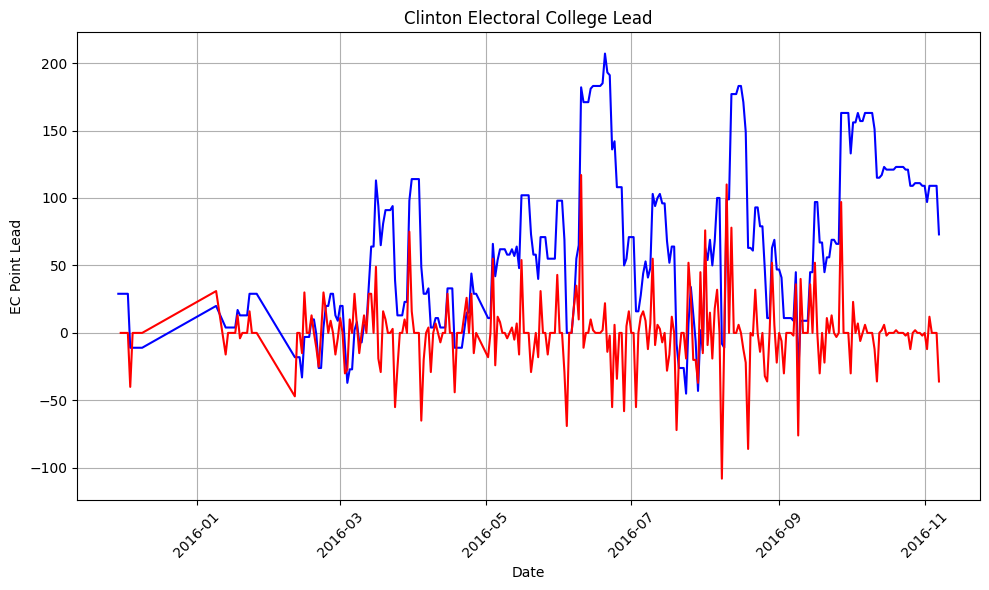

In [25]:
# Plot 'c-minus-t' by day
plt.figure(figsize=(10, 6))

plt.plot(df_daily_sum['day'], df_daily_sum['ec_clinton'], marker=None, linestyle='-', color='b')
plt.plot(df_daily_sum['day'], df_daily_sum['delta'], marker=None, linestyle='-', color='r')



# Add labels and title
plt.xlabel('Date')
plt.ylabel('EC Point Lead')
plt.title('Clinton Electoral College Lead')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Get the 95th percentile value for 'column_name'
percentile = df_daily_sum['ec_clinton'].quantile([0.05,0.95])

# Get rows where 'column_name' exceeds the 95th percentile
extreme_rows = df_daily_sum[(df_daily_sum['ec_clinton'] <= percentile[0.05]) | (df_daily_sum['ec_clinton'] >= percentile[0.95])]

extreme_rows

,day,ec_clinton,delta
26,2016-02-11,-18.0,-47.0
27,2016-02-12,-18.0,0.0
28,2016-02-13,-18.0,0.0
29,2016-02-14,-33.0,-15.0
36,2016-02-21,-26.0,-25.0
37,2016-02-22,-26.0,0.0
48,2016-03-04,-37.0,-27.0
49,2016-03-05,-27.0,10.0
50,2016-03-06,-27.0,0.0
141,2016-06-10,182.0,117.0


In [26]:
# Get the 95th percentile value for 'column_name'
percentile_delta = df_daily_sum['delta'].quantile([0.05,0.95])

# Get rows where 'column_name' exceeds the 95th percentile
extreme_rows_delta = df_daily_sum[(df_daily_sum['delta'] <= percentile_delta[0.05]) | (df_daily_sum['delta'] >= percentile_delta[0.95])]

extreme_rows_delta

,day,ec_clinton,delta
5,2015-12-04,-11.0,-40.0
26,2016-02-11,-18.0,-47.0
60,2016-03-16,113.0,49.0
68,2016-03-24,39.0,-55.0
74,2016-03-30,98.0,75.0
79,2016-04-04,49.0,-65.0
93,2016-04-18,-11.0,-44.0
104,2016-05-04,66.0,55.0
116,2016-05-16,102.0,54.0
131,2016-05-31,98.0,43.0


July 23 - Wikileaks
July